# Example for Regressor Extrapolation: Let's use the Bike rental data again, this time our goal is to predict hourly bike rental ridership 21 days to the future. 


Recall from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


Original Source:

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule


Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data_dir = '/content/drive/MyDrive/Teaching/ML1_MSDS2023/Notebook 7/'

In [4]:
rides = pd.read_csv('Bike_Sharing_hour.csv')

In [5]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Checking out the data (Steps 1-4 Prepare the data)

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. 

Below is a plot showing the number of bike riders over the first 11 days in the data set. You can see the hourly rentals here. The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. 

Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. 

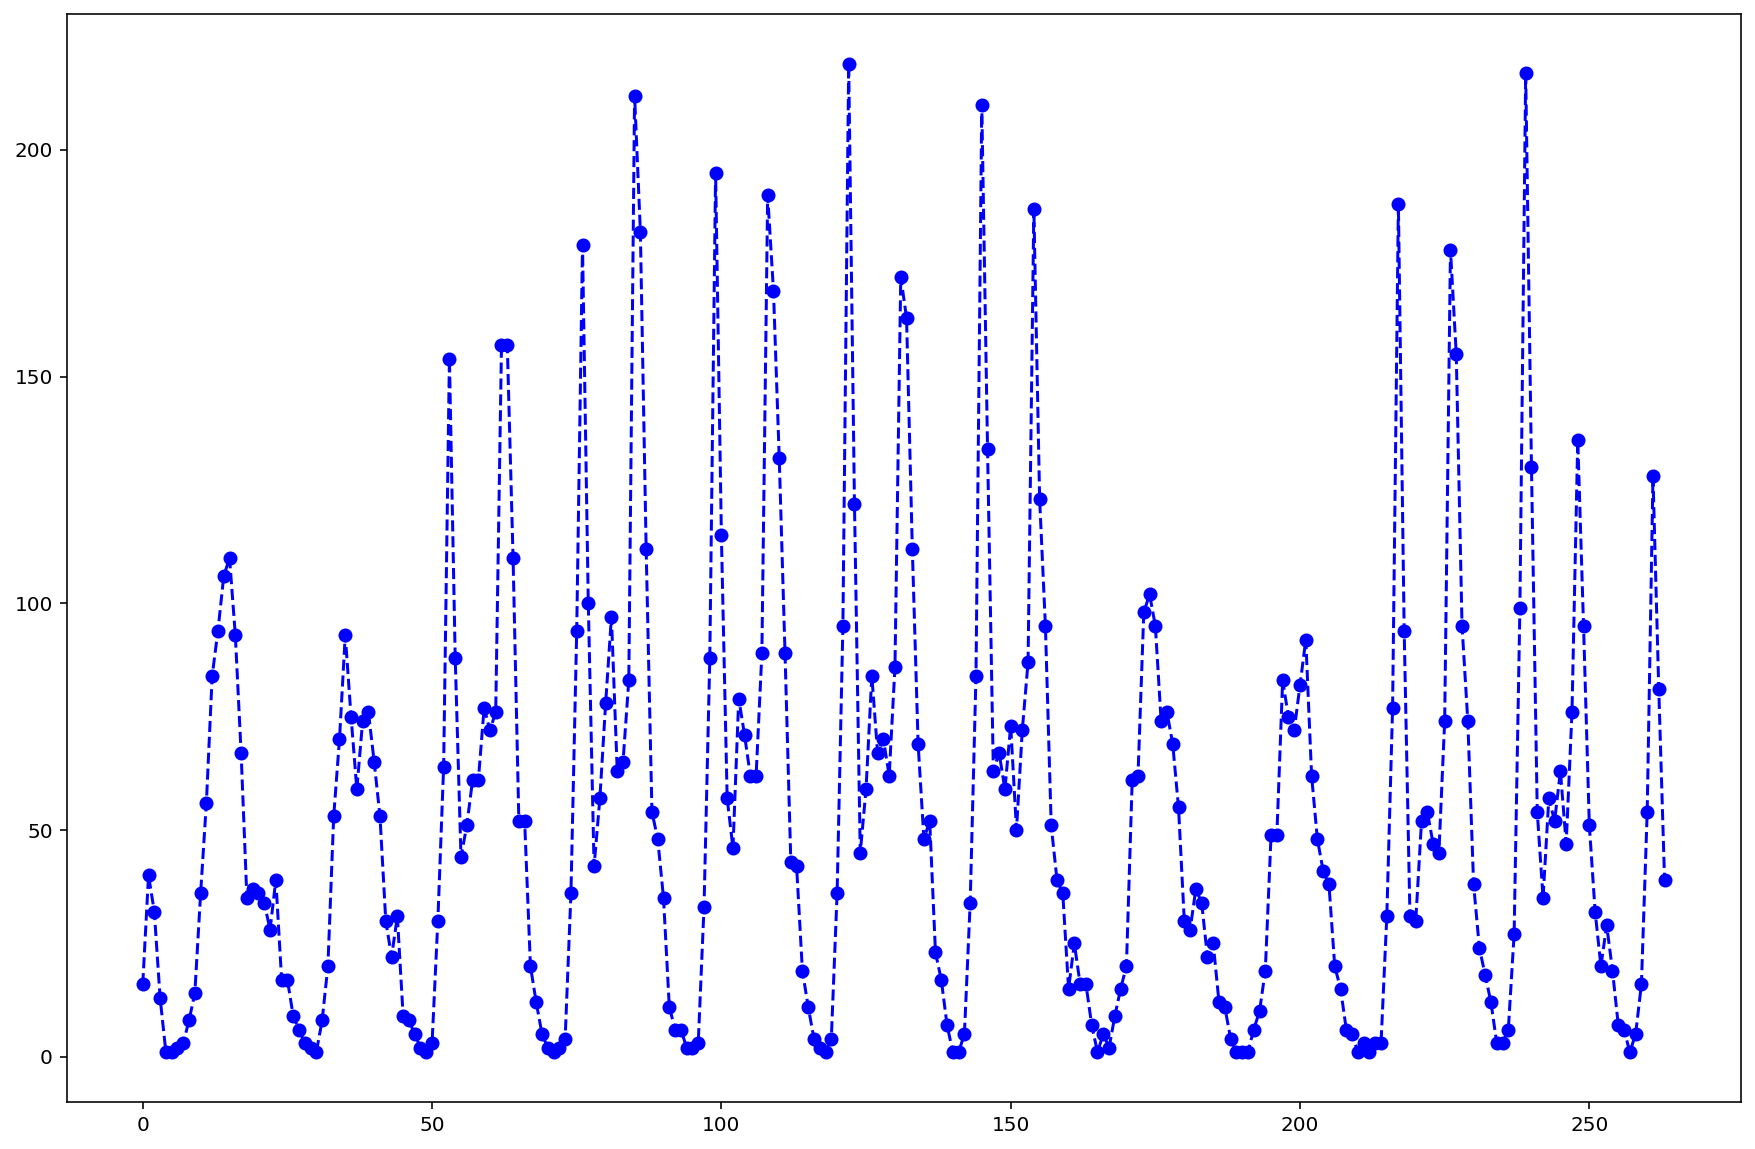

In [7]:
fig = plt.figure(figsize=(15, 10))
number= np.arange(24*11) # This is the first  11 days (every hour data x 24)
plt.plot(number,rides[:24*11]['cnt'] , 'bo--') 

## Categorical Variables
Let's use one hot encode to replace some categorical variables like season, weather, month using `get_dummies()`.

In [8]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head(100)

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0.24,0.48,0.2239,0,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
96,0,0,0.22,0.47,0.1642,0,3,3,1,0,...,0,0,0,0,0,0,1,0,0,0
97,0,0,0.20,0.47,0.2239,0,33,33,1,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0.18,0.43,0.1940,1,87,88,1,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
print (data.columns)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')


In [10]:
len(data.columns)

59

# Step 5: Scaling target variables (optional)
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [11]:
'''quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
  
'''
# Alternatively you can use the min_max scaler 



"quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']\n# Store scalings in a dictionary so we can convert back later\nscaled_features = {}\nfor each in quant_features:\n    mean, std = data[each].mean(), data[each].std()\n    scaled_features[each] = [mean, std]\n    data.loc[:, each] = (data[each] - mean)/std\n  \n"

# Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network (21* 24 hours). We'll use this set to make predictions and compare them with the actual number of riders.

In [12]:

test_data = data[-21*24:]  # Save the last 21 days as test set
data = data[:-21*24]    # All other data except the last 21 days as training set

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields] # Training Set
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields] # Test Set

In [13]:
data.shape #should have 21 x 24 =504 rows, 59 features

(16875, 59)

In [14]:
print ('features dimension =',features.shape)
print ('target dimension =', targets.shape)

features dimension = (16875, 56)
target dimension = (16875, 3)


## Common Practice: from the Training, separate it further into Training Set and Validation Set

By doing so, the Test Set above is a real Test set as it has not seen at all by the machine learning model!

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [15]:
# Hold out the last 60 days of the remaining data as a validation set
val_set =60*24 # in days*hr
train_features, train_targets = features[:-val_set], targets[:-val_set]
val_features, val_targets = features[-val_set:], targets[-val_set:]

In [16]:
train_features.shape

(15435, 56)


# Let's use all of our regressors with default hypertuning parameter

In [17]:
X_train=train_features
y_train=train_targets['cnt']

X_validation=val_features
y_validation=val_targets['cnt']

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#For purpose of Demonstration let's just use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)
Lasso = Lasso()
Lasso.fit(X_train, y_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)
#kNN = KNeighborsRegressor(n_neighbors=8) 
kNN = KNeighborsRegressor() 
kNN.fit(X_train,y_train)
#DT = DecisionTreeRegressor(max_depth=5) 
DT = DecisionTreeRegressor() 
DT.fit(X_train,y_train)
#RF = RandomForestRegressor(n_estimators = 100) 
RF = RandomForestRegressor() 
RF.fit(X_train,y_train)
#GBM = GradientBoostingRegressor(max_depth =4, learning_rate=.2) 
GBM = GradientBoostingRegressor() 
GBM.fit(X_train,y_train)

y_pred_LR = LR.predict(X_validation)
y_pred_Lasso = Lasso.predict(X_validation)
y_pred_Ridge = Ridge1.predict(X_validation)
y_pred_kNN = kNN.predict(X_validation)
y_pred_DT = DT.predict(X_validation)
y_pred_RF = RF.predict(X_validation)
y_pred_GBM = GBM.predict(X_validation)

cols = ['Machine Learning Regression Method','Train Accuracy', 'Validation Accuracy']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['Linear Regression', LR.score(X_train, y_train), LR.score(X_validation, y_validation)]
df2.loc[1] = ['Linear Regression + Lasso', Lasso.score(X_train, y_train), Lasso.score(X_validation, y_validation)]
df2.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y_train), Ridge1.score(X_validation, y_validation)]
df2.loc[3] = ['kNN', kNN.score(X_train, y_train), kNN.score(X_validation, y_validation)]
df2.loc[4] = ['Decision Tree',DT.score(X_train, y_train), DT.score(X_validation, y_validation)]
df2.loc[5] = ['Random Forest',RF.score(X_train, y_train), RF.score(X_validation, y_validation)]
df2.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y_train), GBM.score(X_validation, y_validation)]

df2




,Machine Learning Regression Method,Train Accuracy,Validation Accuracy
0,Linear Regression,0.690801,0.640903
1,Linear Regression + Lasso,0.669590,0.578993
2,Linear Regression + Ridge,0.690837,0.641256
3,kNN,0.837962,0.688070
4,Decision Tree,0.999991,0.749126
5,Random Forest,0.989232,0.823856
6,Gradient Boosting Method,0.781545,0.644675


### Let's look at the training set result for Random Forest

R2 score = 0.988601


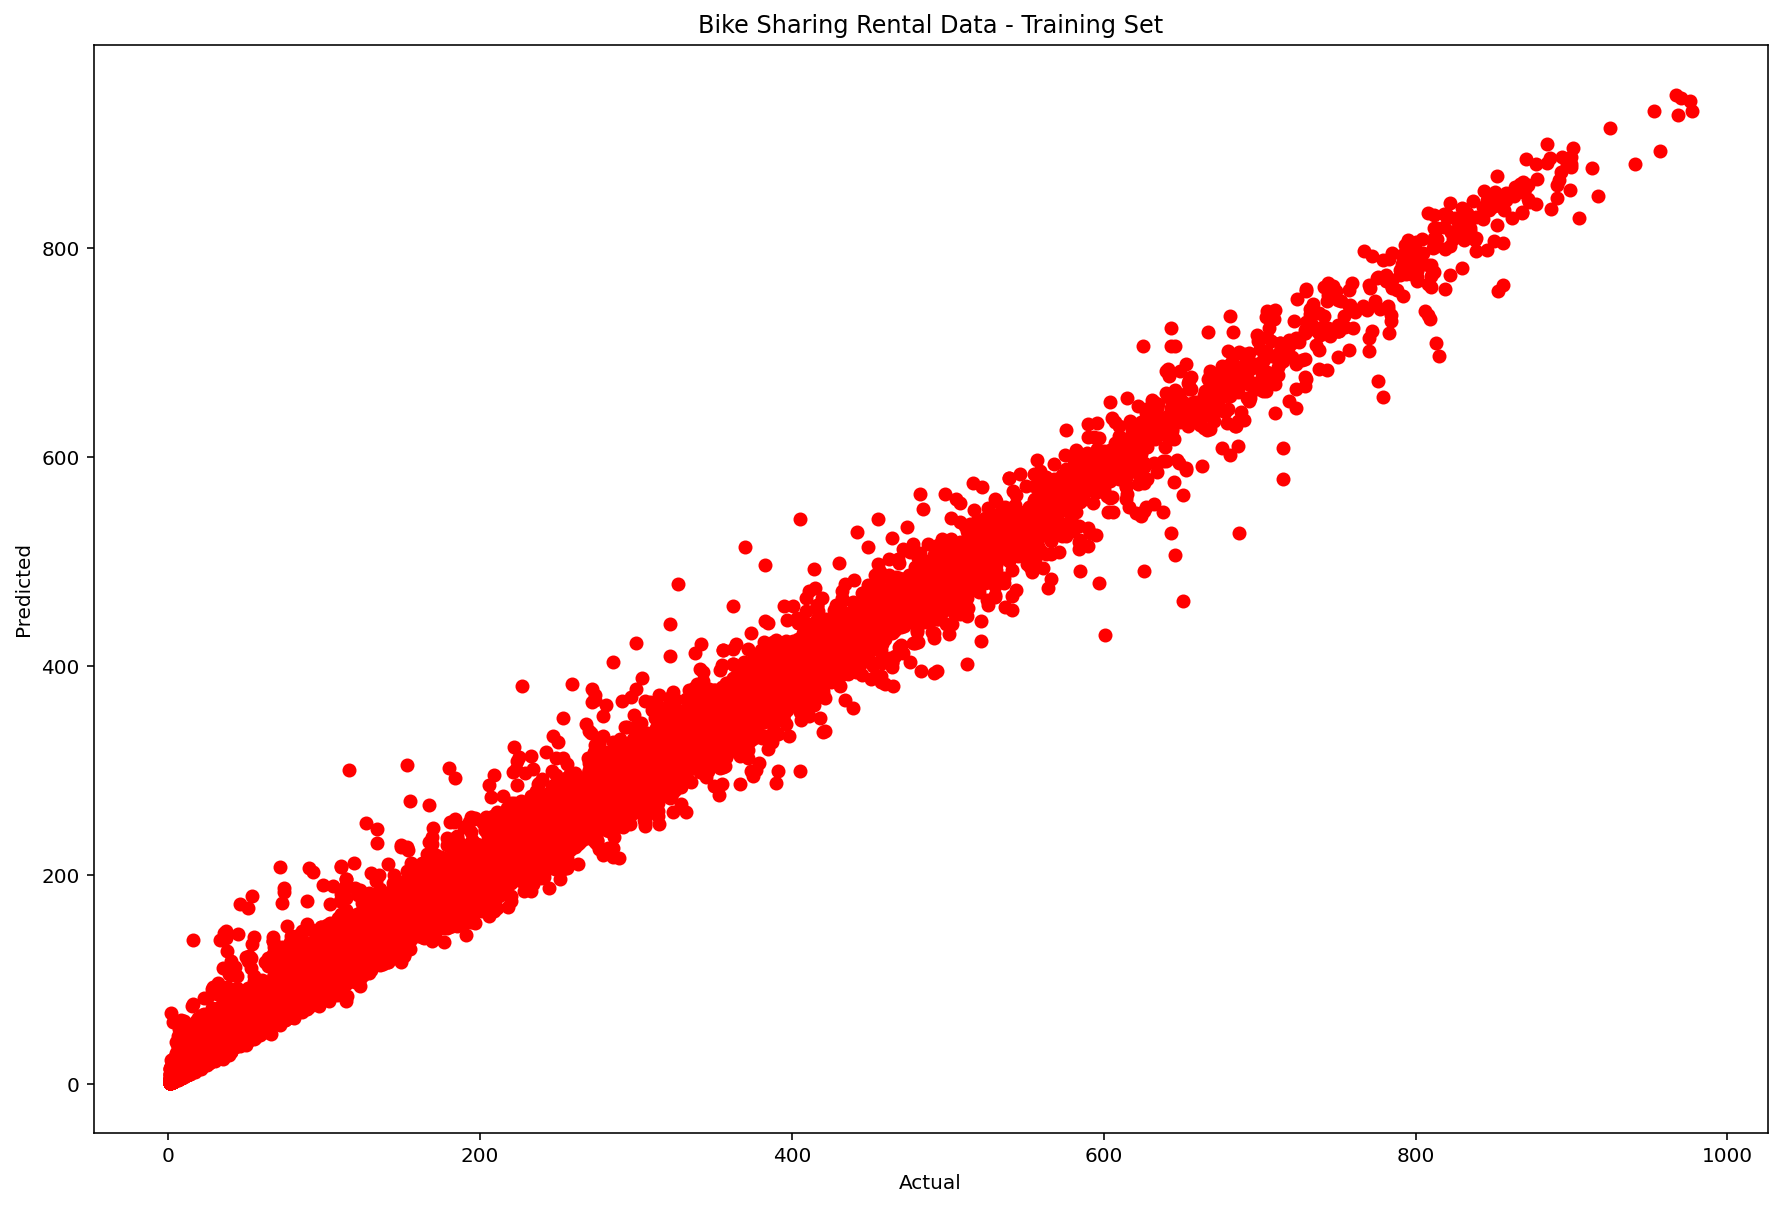

In [18]:
import numpy as np
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(15, 10))
y_train_RF=RF.predict(X_train)
plt.scatter(y_train, y_train_RF, c="r", label="Training Set Accuracy")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Bike Sharing Rental Data - Training Set")
print("R2 score = %f"%r2_score( y_train_RF, y_train))

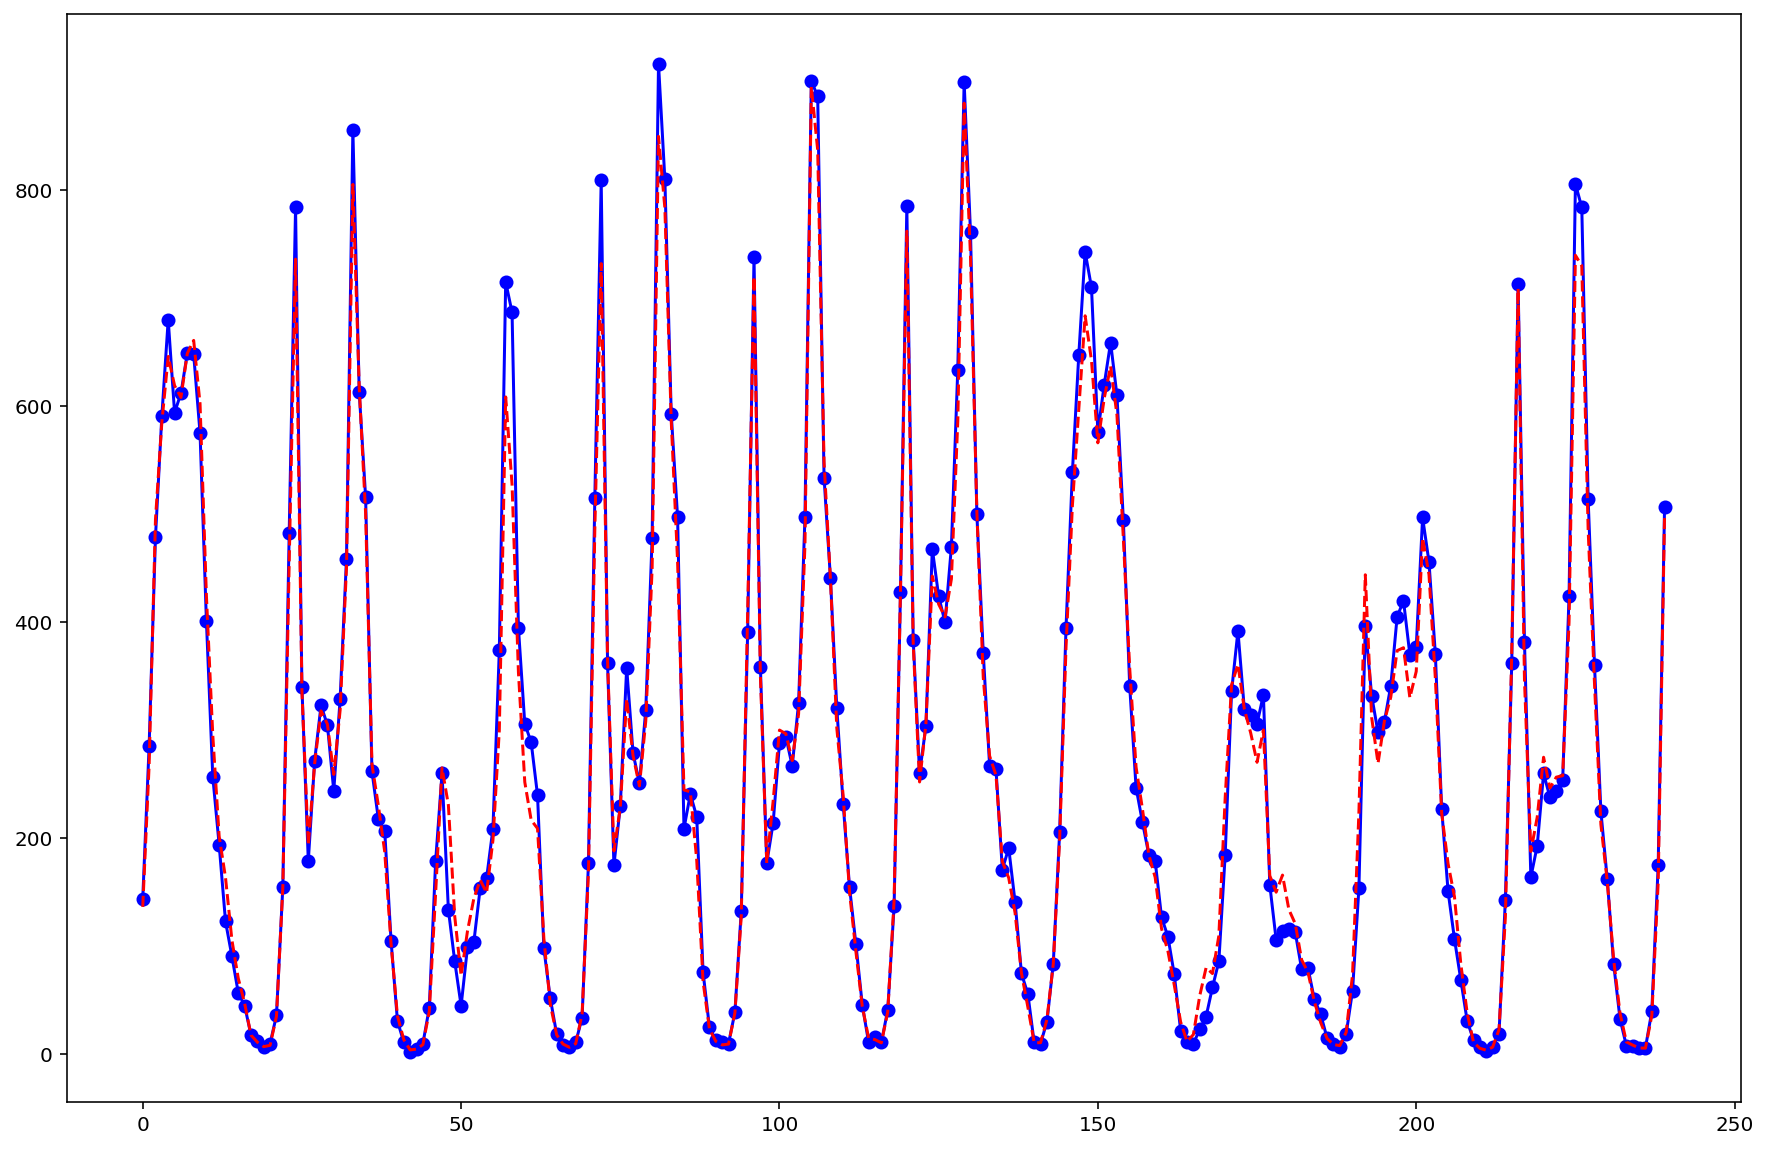

In [19]:
fig = plt.figure(figsize=(15, 10))
number_show =24*10
number = np.arange(number_show)

plt.plot(number, y_train[-number_show:], 'bo-')
plt.plot(number, y_train_RF[-number_show:], 'r--') 

### Let's look at the validation set result for Random Forest

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(15, 10))
y_validation_RF=RF.predict(X_validation)
plt.scatter(y_validation, y_validation_RF, c="r", label="Validation Set Accuracy")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Bike Sharing Rental Data - Validation Set")
print("R2 score = %f"%r2_score(y_validation_RF,  y_validation))

In [ ]:
fig = plt.figure(figsize=(15, 10))
number_show =24*10
number = np.arange(number_show)

plt.plot(number, y_validation[-number_show:], 'bo-')
plt.plot(number, y_validation_RF[-number_show:], 'r--') 

### Let's look at the Test set result for Random Forest

### How about the performance in the real Test data?

R2 score = 0.737090


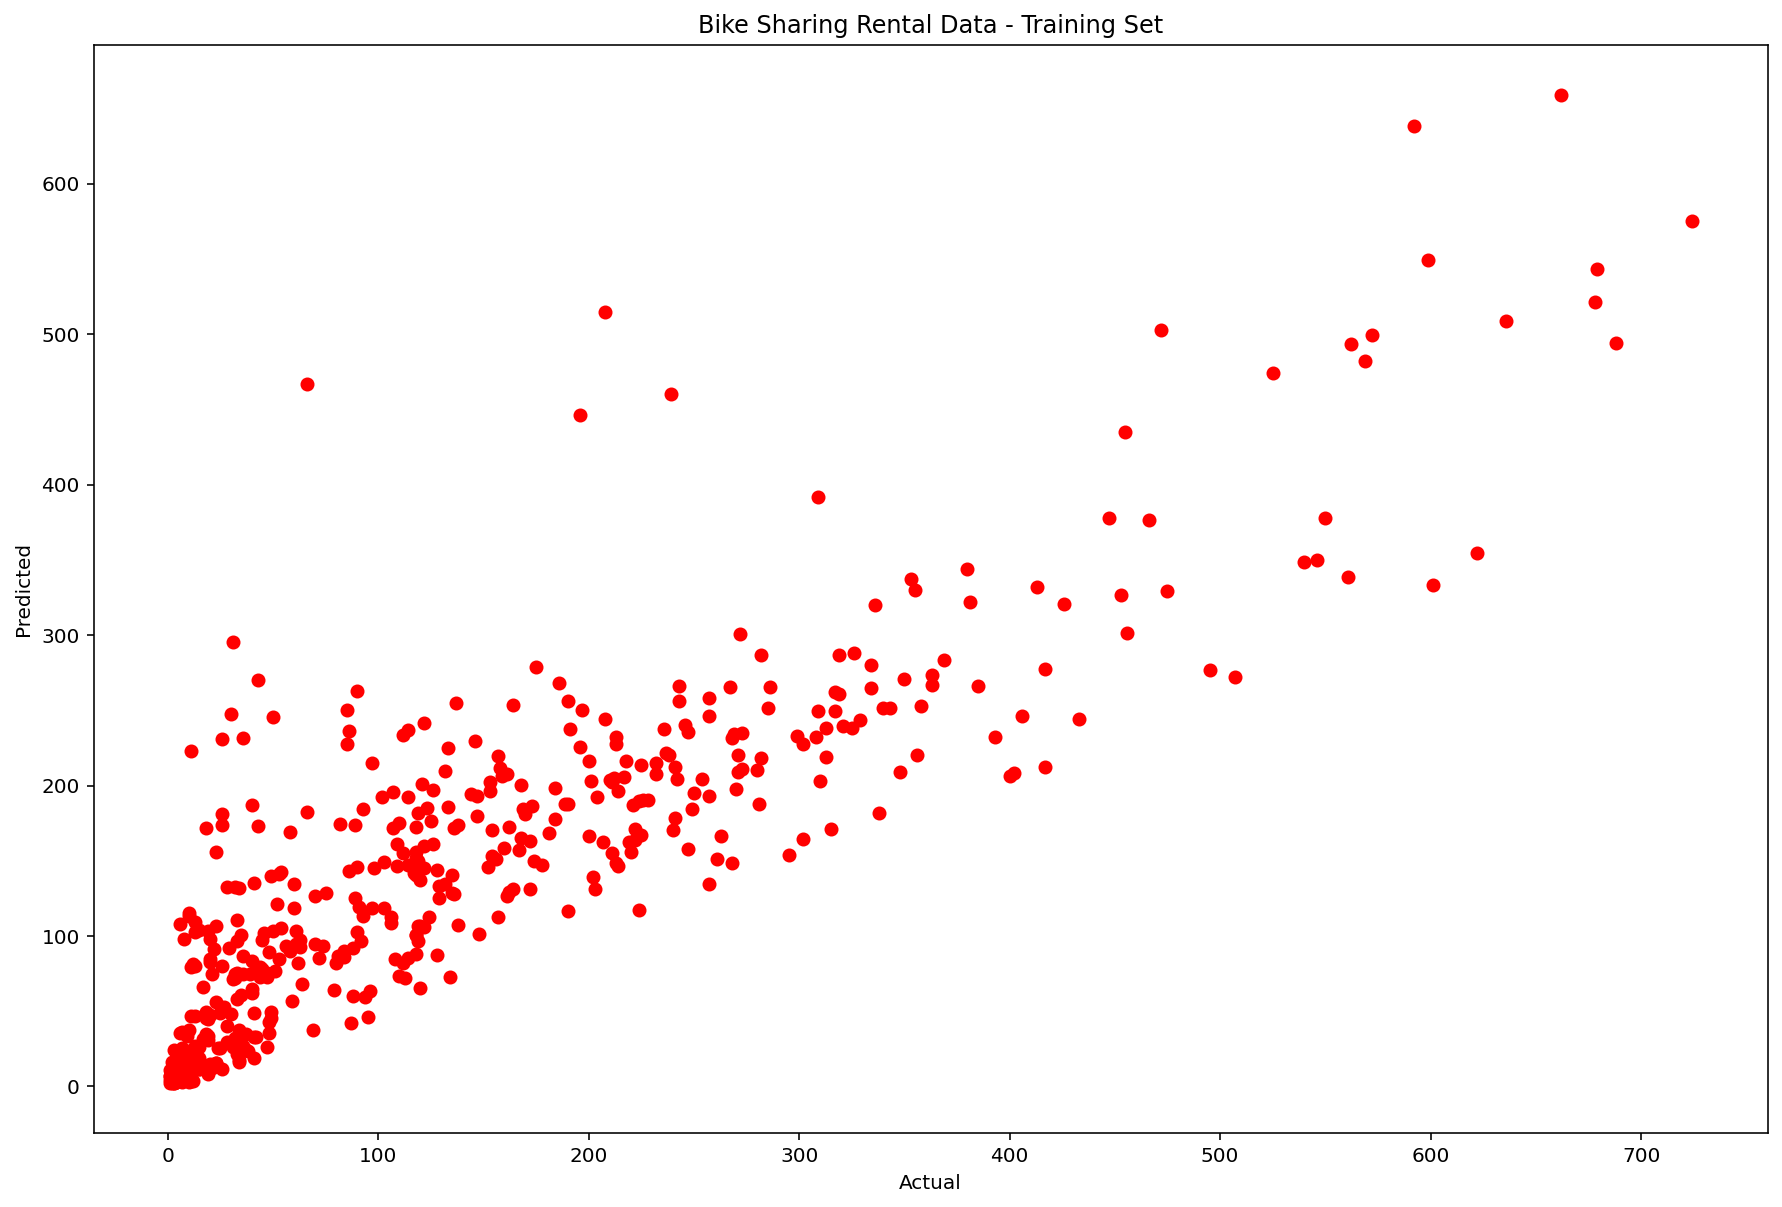

In [20]:
import numpy as np
from sklearn.metrics import r2_score

X_test=test_features
y_test=test_targets['cnt']


fig = plt.figure(figsize=(15, 10))
y_test_RF=RF.predict(X_test)
plt.scatter(y_test,y_test_RF, c="r", label="test (actual) data")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Bike Sharing Rental Data - Training Set")
print("R2 score = %f"%r2_score( y_test,y_test_RF))

In [ ]:
fig = plt.figure(figsize=(15, 10))
number_show =24*21
number = np.arange(number_show)

plt.plot(number, y_test[-number_show:], 'bo-')
plt.plot(number, y_test_RF[-number_show:], 'r--') 

# HW 5 - Auto ML 10 in 1

Utilized GridSearchCV and created a function that will accept Train-Validation Data Set and a Test Set we can score. <br>
<br>
The function would run through all 10 models and different scaling options set with default parameters (we can update the param_grid to tune it) for a baseline run. Defined TimeSeriesSplit for the cv since we need the data to be in order as discussed in our class. We can also identify a scaler however the dataset is already scaled and just set it to None but we can try out multiple scaling options to reduce testing time.<br>
It will return a Data Frame with the summary of the fields below:<br>
<br>
'Model' – Name of the Model (kNN, LR, Ridge, Lasso, DecisionTrees, RandomForest, GBM, AdaBoost, XGB, LGB)<br>
'Scaler' – The applied Applicable only to kNN, LR, Ridge and Lasso<br>
'Method / Estimators' – Will return best hyperparameters (if default then no parameters would be returned) <br>
'Train Score' – Mean training score<br>
'Validation Score' – Mean validation score<br>
'Test Score' – Test score from the input<br>
'Top Predictor' – Best feature for the model prediction<br>
'Fit Run Time' – Mean Run Time when fitting the data<br>
'Val Run Time' – Mean Run Time when validating the data<br>
'Test Run Time' – Run time when scoring the Test data<br>
'Total Run Time' – Total run time of the GridSearchCV for the model<br>
'Features' – List of scores of the features, will be used in the Feature Importance Graph<br>


In [103]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as ltb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

def train_model(X, y, X_t, y_t):
    """
    X =   Feature Train Validation Set
    y =   Target Train Validation Set
    X_t = Feature Test Set
    y_t = Target Test Set
    
    Return Data Frame with summary of the model execution
    """
    cv = TimeSeriesSplit(n_splits=4)
    step = 1
    #scalers = [Normalizer(), MinMaxScale(), StandardScaler()]
    #scalers = [Normalizer()]
    scalers = [None]
    
    grids = []
    lst_summary = []
    scoring = 'r2'

    for scaler in scalers:
        steps = [('scaler', scaler), ('clf', KNeighborsRegressor())]
        pipe = Pipeline(steps)
        param_grid = {}
        gs = GridSearchCV(estimator=pipe,
                              param_grid=param_grid,
                              cv=cv,
                              scoring=scoring,
                              n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                              return_train_score=True) # True to return both the train and test scores
        
        grids.append([gs, 'kNN', scaler])

        steps = [('scaler', scaler), ('clf', LinearRegression())]
        pipe = Pipeline(steps)
        param_grid = {'clf__fit_intercept': [True], 'clf__positive': [True]}
        param_grid = {'clf__positive': [True]}
        gs = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores
        grids.append([gs, 'Linear Regression', scaler])

        steps = [('scaler', scaler), ('clf', Lasso())]
        pipe = Pipeline(steps)
        param_grid = {}
        gs = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores
        grids.append([gs, 'Lasso', scaler])

        steps = [('scaler', scaler), ('clf', Ridge())]
        pipe = Pipeline(steps)
        param_grid = {}
        gs = GridSearchCV(estimator=pipe,
                               param_grid=param_grid,
                               cv=cv,
                               scoring=scoring,
                               n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                               return_train_score=True) # True to return both the train and test scores
        grids.append([gs, 'Ridge', scaler])

    steps = [('scaler', None), ('clf', DecisionTreeRegressor())]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs, 'DT', None])

    steps = [('scaler', scaler), ('clf', RandomForestRegressor())]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs, 'RF', None])

    steps = [('scaler', None), ('clf', GradientBoostingRegressor())]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs,'GBM', None])

    steps = [('scaler', None), ('clf', AdaBoostRegressor())]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs, 'AdaBoost', None])

    steps = [('scaler', None), ('clf', xgb.XGBRegressor(verbosity=0))]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs, 'XGB', None])

    steps = [('scaler', None), ('clf', ltb.LGBMRegressor(verbose=-1))]
    pipe = Pipeline(steps)
    param_grid = {}
    gs = GridSearchCV(estimator=pipe,
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1, # -1 to run jobs in parallel for faster runtime
                           return_train_score=True) # True to return both the train and test scores
    grids.append([gs, 'LGB', None])
    
    for i, m, s in grids:
        t_start_stime =  time.time()
        i.fit(X, y)
        start_time = time.time()
        pred_perf = i.score(X_t, y_t)
        end_time = time.time() - start_time
        t_end_time =  time.time() - t_start_stime
        try:
            top_pred = X.columns[(np.argmax(i.best_estimator_.named_steps.clf.coef_))]
            pred_ = i.best_estimator_.named_steps.clf.coef_
        except:
            try:
                top_pred = X.columns[(np.argmax(i.best_estimator_.named_steps.clf.feature_importances_))]
                pred_ = i.best_estimator_.named_steps.clf.feature_importances_
            except:
                pred_ = top_pred = 'N/A'
        lst_summary.append([m, s, i.best_estimator_.steps[step], 
                           i.__dict__['cv_results_']['mean_train_score'][i.best_index_],
                           i.__dict__['cv_results_']['mean_test_score'][i.best_index_],
                           pred_perf,
                           top_pred,
                           i.__dict__['cv_results_']['mean_fit_time'][i.best_index_],
                           i.__dict__['cv_results_']['mean_score_time'][i.best_index_],
                           end_time,
                           t_end_time,
                           pred_
                           ])
    df_summary = pd.DataFrame(lst_summary, 
                              columns=['Model','Scaler', 'Method / Estimators', 
                                       'Train Score', 'Validation Score', 'Test Score',
                                       'Top Predictor', 'Fit Run Time', 'Val Run Time', 
                                       'Test Run Time', 'Total Run Time', 'Features'])
    
    return df_summary



# Prepare data set and run model
Call the train_model AutoML function and load results into df_bikers.

In [104]:
trainval_features, trainval_targets = features[:-val_set], targets[:-val_set]
val_features, val_targets = features[-val_set:], targets[-val_set:]

X_trainval = trainval_features
y_trainval = trainval_targets['cnt']

X_test = test_features
y_test = test_targets['cnt']

df_bikers = train_model(X_trainval, y_trainval, X_test, y_test)


# Displays the resulting Data Frame
Dropped the 'Method / Estimators','Features' fields for cleaner data frame. <br>

The LR result set can be adjusted further by using a Normalizer() on the data set.

In [105]:
pd.options.display.float_format = '{:.6f}'.format
df_display = df_bikers.drop(['Method / Estimators','Features'], axis=1)
display(df_display)

,Model,Scaler,Train Score,Validation Score,Test Score,Top Predictor,Fit Run Time,Val Run Time,Test Run Time,Total Run Time
0,kNN,None,0.803913,0.552544,0.660484,N/A,0.005251,0.460854,0.096021,3.131703
1,Linear Regression,None,0.676352,-25459073132905375989760.000000,0.452792,mnth_9,0.037008,0.002250,0.002001,0.159037
2,Lasso,None,0.643281,0.497868,0.519995,hr_17,0.010752,0.002001,0.002001,0.065013
3,Ridge,None,0.681642,0.577034,0.457649,hr_17,0.009252,0.001751,0.000999,0.060013
4,DT,None,0.999995,0.514136,0.517370,temp,0.062764,0.002501,0.002001,0.268062
5,RF,None,0.983628,0.667074,0.736089,temp,3.756432,0.043735,0.016004,13.736464
6,GBM,None,0.775602,0.595090,0.601506,temp,0.684653,0.004501,0.002001,2.489560
7,AdaBoost,None,0.383741,0.342499,-0.100609,temp,0.441348,0.015538,0.004002,1.807915
8,XGB,None,0.976083,0.769607,0.735613,hr_3,1.253952,0.018004,0.004001,2.523325
9,LGB,None,0.934954,0.719551,0.771310,temp,0.098272,0.017004,0.001001,0.336076


# Feature Importance Graphs
Prepares the Data Frame since we need to drop kNN due to it not having a top predictor.

In [106]:
df_feat = df_bikers[df_bikers.Model != 'kNN'][['Model' ,'Features']]
df_features = pd.DataFrame(df_feat.Features.to_list(), columns=X_train.columns, index=df_feat.Model)

Use subplots to display the 9 Feature importance Bargraphs

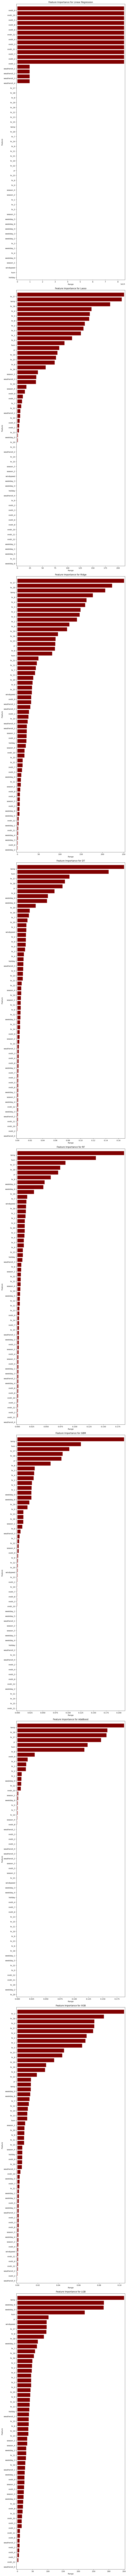

In [108]:
fig, axs = plt.subplots(9, 1, figsize=(10,200))

for key, ax in enumerate(axs):
    val = df_features.iloc[0+key:1+key].values[0]
    ids = np.argsort(np.abs(val))
    ax.barh(df_features.columns[ids], 
                  sorted(np.abs(val)), 
                  color='maroon', align='edge', height=0.8)
    ax.set_title(f'Feature Importance for {df_features.index[key]}')
    ax.set_xlabel('Range')
    ax.set_ylabel('Feature')
    ax.use_sticky_edges = False
    ax.autoscale_view(scaley=True)
    ax.margins(.009)
fig.tight_layout()
plt.show()
